In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

### Initialization and attributes

You can initialize the environment / game as following:

In [2]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [4]:
env.render()

|- - -|
|- - -|
|- - -|



### Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [5]:
env.step(2)

(array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 False,
 None)

In [6]:
env.render()

|- - X|
|- - -|
|- - -|



In [7]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [8]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [9]:
env.render()

|- - X|
|- O -|
|- - -|



In [10]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [11]:
#env.step((0,2))

### Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [13]:
env.reward(player='X')

0

In [14]:
env.reward(player='O')

0

An example of finishing the game:

In [15]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [16]:
env.render()

|X X X|
|O O -|
|- - -|



In [17]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [18]:
env.reward(player='X')

1

In [19]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [20]:
env.reset();

In [21]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [22]:
opt_player.act(env.grid)

(1, 1)

In [23]:
opt_player.player

'X'

### An example of optimal player playing against random player

In [24]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)] #randomly assigning who plays first
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X O X|
|- O X|
|- O -|

-------------------------------------------
Game end, winner is player None
Optimal player = O
Random player = X
|O X O|
|X O X|
|X O X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|- - O|
|X O X|
|O - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O O X|
|- X X|
|O - X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X - O|
|X O -|
|O - X|



### An example of optimal player playing against optimal player

In [25]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X O X|
|X O O|
|O X X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X X|
|X O O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|X O X|
|O O X|
|X X O|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|X O X|
|X O O|
|O X X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X X|
|X O O|
|X O X|



## Implementation of Qlearning

In [25]:
from collections import defaultdict
from random import randint
from random import random
    
def valid_move(grid, move):
    return grid[move] == 0

def agrmax(array):
    i_max = 0
    for i, elem in enumerate(array):
        if elem>array[i_max]:
            i_max = i
    return i_max

def grid_repr(grid):
    between_0_2 = grid.reshape((9))+1
    power_of_3 = 3**np.arange(9)
    return (between_0_2*power_of_3).sum()


class QLearning():
    
    def __init__(self, alpha=0.05, gamma=0.99, epsilon=0.1):
        self.q_values = defaultdict(lambda : 0)
        self.last_grid = None
        self.last_action = None

        self.alpha=alpha
        self.gamma=gamma
        self.epsilon=epsilon
    
        
       
        
    def act(self, grid):
        move = self._act_random(grid) if random()<self.epsilon else self._act_optimal(grid)
        self._update_qvalue(grid, move)
        
       
        return move
    
    
    def _act_optimal(self, grid):
        actions = [(x,y) for x in range(3) for y in range(3) if valid_move(grid, (x,y))]
        actions_values = list([self.q_value(grid, a) for a in actions])
        
        move = actions[agrmax(actions_values)]
        return move
        
        
    def _act_random(self, grid):
        actions = [(x,y) for x in range(3) for y in range(3) if valid_move(grid, (x,y))]
        move = actions[randint(0,len(actions)-1)]
        return move
    
    def q_value(self, grid, move):
        return self.q_values[(grid_repr(grid),move)]
    def change_qvalue(self, grid, move, value):
        self.q_values[(grid_repr(grid),move)] = value
    
    
    def update_qvalue_end(self, reward=0):
        if self.last_grid is not None and self.last_action is not None:
            state_action = (self.last_grid,self.last_action)
            estimated_q = self.q_value(*state_action)
            delta_q = reward  - estimated_q
            self.change_qvalue(*state_action, estimated_q+self.alpha*delta_q)
          
        
     
        self.last_grid = None
        self.last_action = None
          
    
    def _update_qvalue(self,grid, move, reward=0):
        if self.last_grid is not None and self.last_action is not None:
            action = self._act_optimal(grid)
            state_action = (self.last_grid,self.last_action)
            estimated_q = self.q_value(*state_action)
            delta_q = reward + self.gamma*self.q_value(grid,action) - estimated_q
            self.change_qvalue(*state_action, estimated_q+self.alpha*delta_q)
        
            
        self.last_grid = grid
        self.last_action = move
        
    def update_epsilon(self, new_epsilon):
        self.epsilon = new_epsilon

### Checking if the algorithm works 

In [43]:
Turns = np.array(['X','O'])
q_player = QLearning()

for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = q_player.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Q player = ' +  Turns[1])
            q_player.update_qvalue_end(reward=env.reward(player=Turns[1]))
    
            env.reset()
            break

-------------------------------------------
Game end, winner is player X
Optimal player 1 = X
Q player = O
-------------------------------------------
Game end, winner is player O
Optimal player 1 = O
Q player = X
-------------------------------------------
Game end, winner is player O
Optimal player 1 = O
Q player = X
-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Q player = X
-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Q player = X


___

## Part 2.1

### Question 1. 

Plot average reward for every 250 games during training – i.e. after the 50th game, plot the average reward of the first 250 games, after the 100th game, plot the average reward of games 51 to 100, etc. Does the agent learn to play Tic Tac Toe?

In [44]:
env = TictactoeEnv()
Turns = np.array(['X','O'])
q_player = QLearning()
avg_rewards = np.empty(80, float)
s = 0
k = 0

for i in range(20000):
    grid, _, __ = env.observe()
    player_opt = OptimalPlayer(epsilon=0.5, player=Turns[np.mod(i,2)]) #switching first player per game
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = q_player.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            if np.mod(i,1000) == 0:
                print('-------------------------------------------')
                print('Game: ' + str(i))
                print('Optimal player = ' +  Turns[np.mod(i,2)])
                print('Q player = ' +  Turns[np.mod(i+1,2)])
                print('Game ended, winner is player ' + str(winner))
            
            
            q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])
            
            # Storing q_player_reward
            s += q_player_reward 
            if np.mod(i+1, 250) == 0:
                avg_rewards[k] = s / 250.0
                s = 0
                k += 1
            q_player.update_qvalue_end(reward=q_player_reward)
            
    
            env.reset()
            break

-------------------------------------------
Game: 0
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 1000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 2000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 3000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 4000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 5000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 6000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 7000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 800

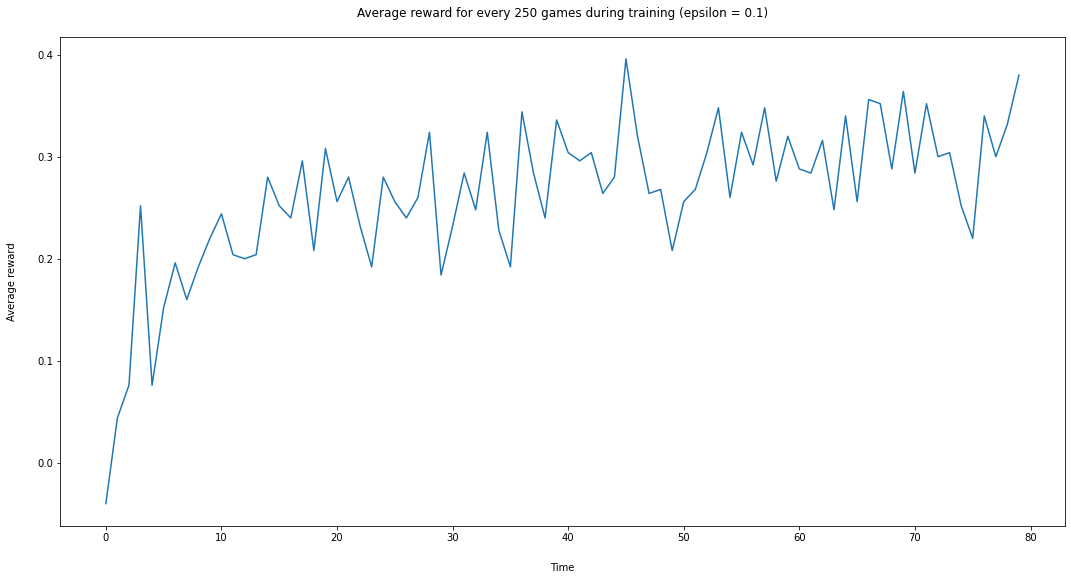

In [45]:
fig = plt.figure(figsize=(18,9))
ax = sns.lineplot(x=range(0, len(avg_rewards)), y = avg_rewards)
ax.set_title('Average reward for every 250 games during training (epsilon = 0.1)', pad = 20)
plt.ylabel('Average reward', labelpad = 20)
plt.xlabel('Time', labelpad = 20)
plt.show()

### Question 2. 

Plot average reward for every 250 games during training. Does decreasing help training compared to having a fixed ? What is the effect of n*?
Expected answer: A figure showing average reward over time for different values of n*

In [26]:
def epsilon(n, n_star, epsilon_min = 0.1, epsilon_max = 0.8):
    return np.maximum(epsilon_min, epsilon_max*(1-n/n_star))

In [27]:
def compute_M(q_player, epsilon, n_games = 500):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    q_player_epsilon = q_player.epsilon
    q_player.update_epsilon(new_epsilon = 0)
    n_wins = 0
    n_loss = 0
    
    player_opt = OptimalPlayer(epsilon=epsilon, player=Turns[1])
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        
        #QPlayer plays first for the first 250 games and we switch to the optimal player after n_games/2 games
        if i == n_games//2 :
            player_opt.player = Turns[0]
        
        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = q_player.act(grid)

            grid, end, winner = env.step(move, print_grid=False)

            if end:
                if i < n_games/2 :
                    if winner == 'X':
                        n_wins += 1
                    else :
                        n_loss += 1
                        
                else:
                    if winner == 'X':
                        n_loss += 1
                    else:
                        n_wins += 1
                        
                env.reset()
                break
    
    q_player.update_epsilon(new_epsilon = q_player_epsilon)
    return (n_wins-n_loss)/n_games
        

In [28]:
def play_epsilon_n_strategy(n_star, n_games = 20000, player_opt_epsilon = 0.5, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    q_player = QLearning()
    
    array_length = int(n_games/average_length)
    
    avg_rewards = np.empty(array_length, float) #list that stores the avg reward for each 'average_length' games
    
    M_opts = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    M_rands = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    
    s = 0 # variable which summs the average reward every 250 games  
    k = 0 # array_index
    
    player_opt = OptimalPlayer(epsilon=player_opt_epsilon, player=Turns[0])
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        player_opt.player = Turns[np.mod(i,2)] #switching first player per game
        q_player.update_epsilon(new_epsilon = epsilon(i, n_star))

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = q_player.act(grid)

            grid, end, winner = env.step(move, print_grid=False)

            if end:
                    
                q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])

                # Storing q_player_reward
                s += q_player_reward 
                if np.mod(i+1, average_length) == 0:
                    avg_rewards[k] = s / 250.0
                    s = 0
                                    
                    #Computing M_Opt
                    M_opts[k] = compute_M(q_player, 0.0)
                    
                    #Computing M_rand
                    M_rands[k] = compute_M(q_player, 1.0)
                    
                    k += 1
                    
                q_player.update_qvalue_end(reward=q_player_reward)


                env.reset()
                break
                
    return avg_rewards, M_opts, M_rands


In [33]:
n_stars = np.array([1, 50, 200, 750, 4000, 8000, 16000, 32000, 40000])
result = np.array([play_epsilon_n_strategy(n_star) for n_star in tqdm(n_stars)])

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [55:16<00:00, 368.49s/it]


In [34]:
avg_rewards = result[:,0,:]
M_opts = result[:, 1, :]
M_rands = result[:, 2, :]

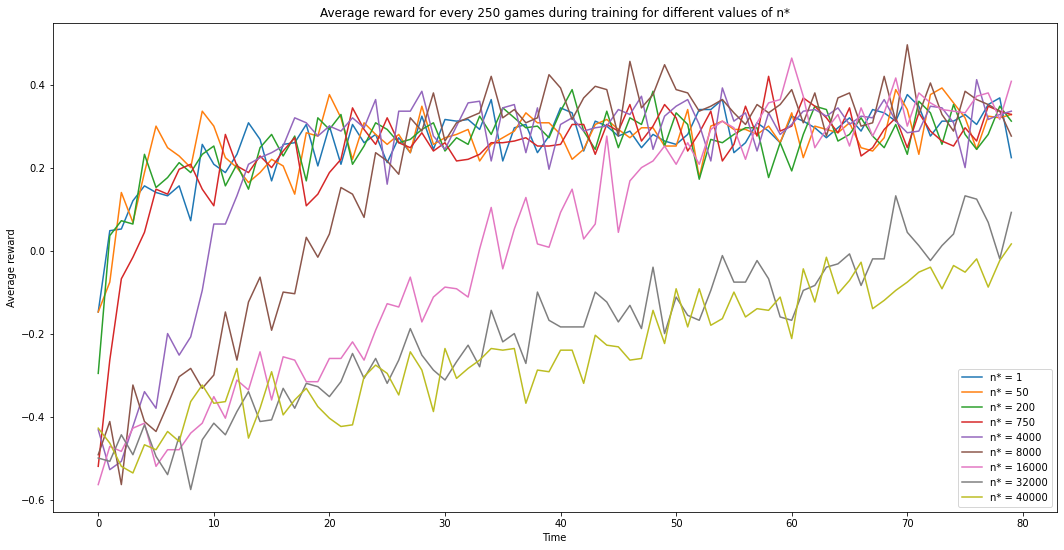

In [35]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = avg_rewards[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('Average reward for every 250 games during training for different values of n*')
plt.ylabel('Average reward')
plt.xlabel('Time')
plt.show()

### Question 3

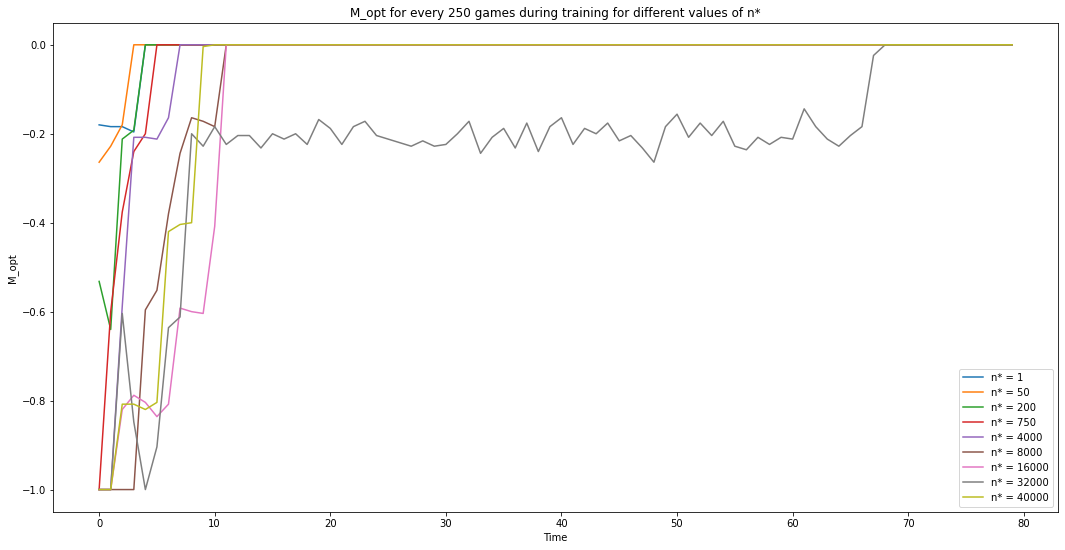

In [36]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of n*')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

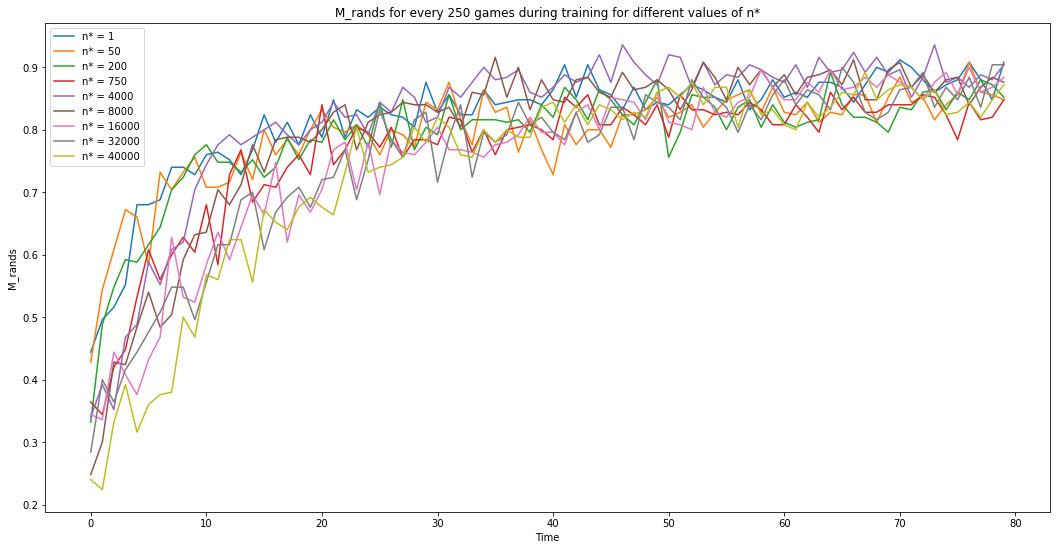

In [37]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of n*')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()

### Question 4 & 5

In [38]:
n_star = 8000
e_opts = np.array([0.0, 0.1, 0.25, 0.5, 0.6, 0.75, 0.9, 1.0])
result = np.array([play_epsilon_n_strategy(n_star, player_opt_epsilon = e_opt) for e_opt in tqdm(e_opts)])
M_opts = result[:, 1, :]
M_rands = result[:, 2, :]

100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [43:50:41<00:00, 19730.19s/it]


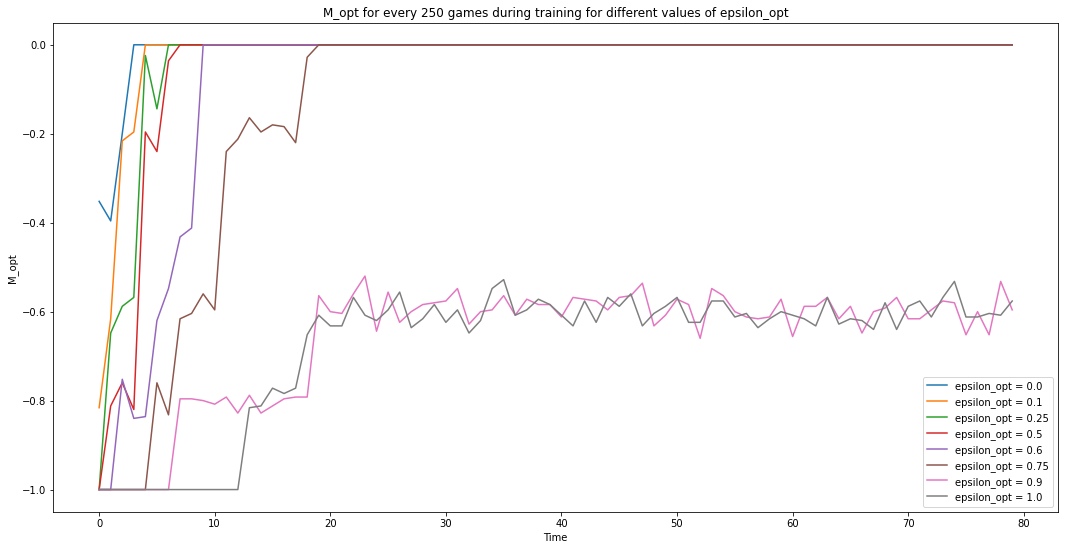

In [42]:
fig = plt.figure(figsize=(18,9))
for i in range(len(e_opts)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'epsilon_opt = ' + str(e_opts[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of epsilon_opt')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

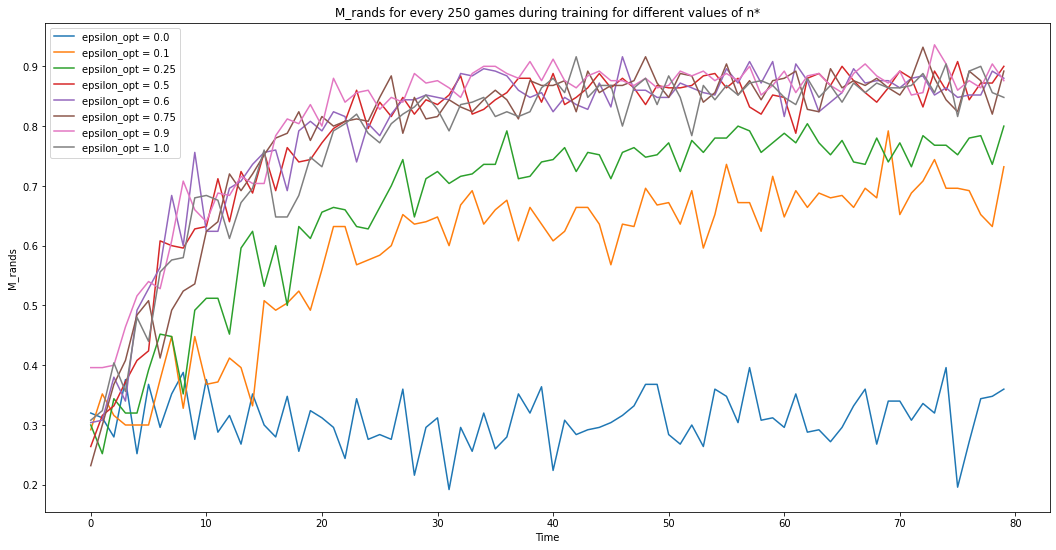

In [44]:
fig = plt.figure(figsize=(18,9))
for i in range(len(e_opts)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'epsilon_opt = ' + str(e_opts[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of n*')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()

___

## Part 2.2

### Question 7

In [29]:
def play_against_self_strategy(epsilon, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    
    q_player_one = QLearning(epsilon = epsilon)
    q_player_two = QLearning(epsilon = epsilon)
    
    q_player_two.q_values = q_player_one.q_values
    
    array_length = int(n_games/average_length)
    
    M_opts = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    M_rands = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    
    k = 0
    
    for i in range(n_games):
        grid, _, __ = env.observe()
    
        q_player_two_turn = Turns[np.mod(i,2)] #Switching who starts at each iteration between q_player_one and q_player_two
    
        for j in range(9):
            
            if env.current_player == q_player_two_turn:
                move = q_player_two.act(grid)
            else:
                move = q_player_one.act(grid)
            
            grid, end, winner = env.step(move, print_grid=False)
 
            
            if end:
                    
                q_player_one_reward = env.reward(player=Turns[np.mod(i+1,2)])
                q_player_two_reward = env.reward(player=q_player_two_turn)
                
                if np.mod(i+1, average_length) == 0:
                  
                    #Computing M_Opq_player_one.epsilont
                    M_opts[k] = compute_M(q_player_one, 0.0)
                  
                    
                    #Computing M_rand
                    M_rands[k] = compute_M(q_player_one, 1.0)
                    
                    k += 1
                    
                q_player_one.update_qvalue_end(reward=q_player_one_reward)
                q_player_two.update_qvalue_end(reward=q_player_two_reward)

                env.reset()
                break
                
    return M_opts, M_rands

In [ ]:
epsilons = np.array([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
result = np.array([play_against_self_strategy(e) for e in tqdm(epsilons)])

In [47]:
M_opts = result[:, 0, :]
M_rands = result[:, 1, :]

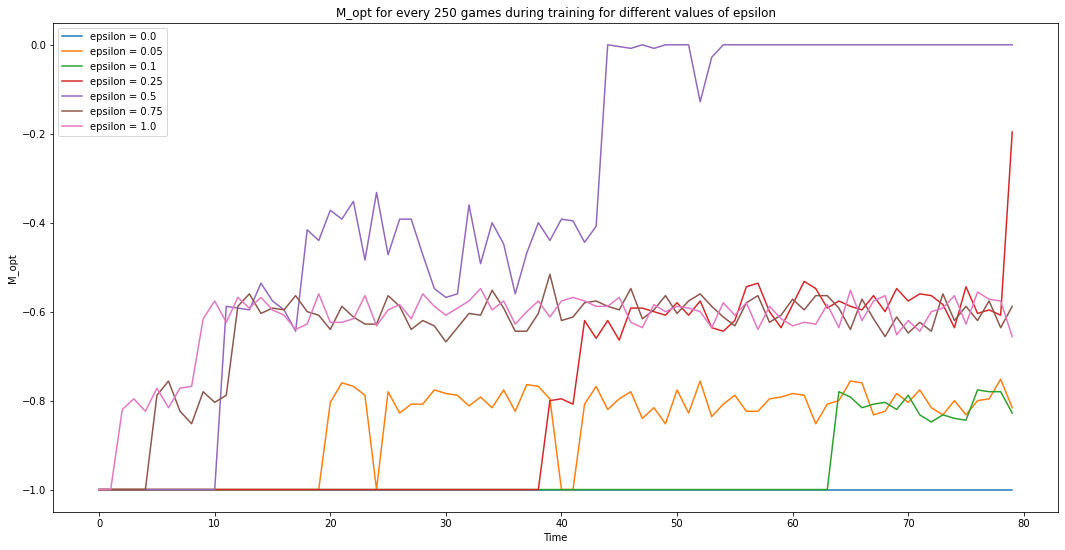

In [48]:
fig = plt.figure(figsize=(18,9))
for i in range(len(epsilons)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'epsilon = ' + str(epsilons[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of epsilon')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

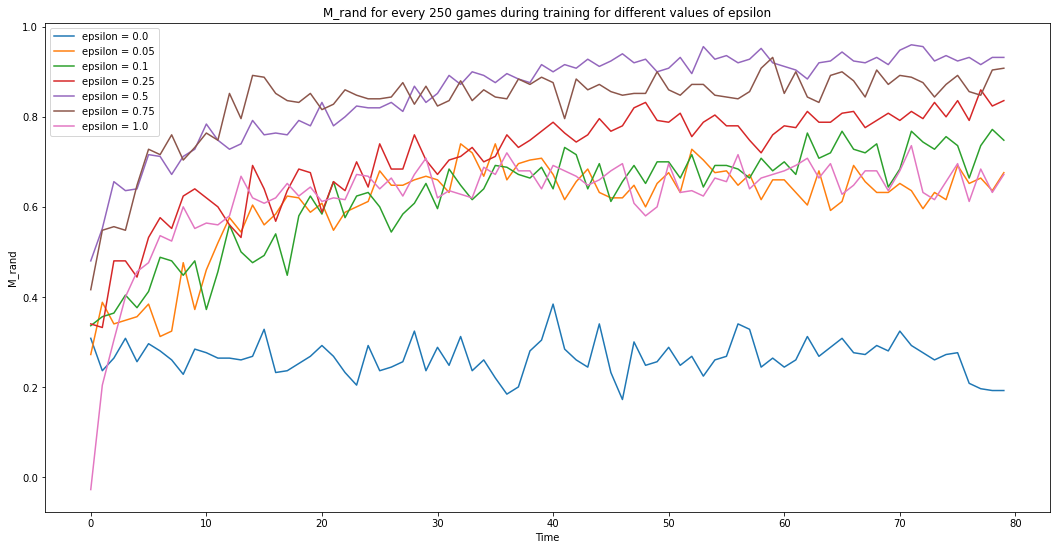

In [49]:
fig = plt.figure(figsize=(18,9))
for i in range(len(epsilons)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'epsilon = ' + str(epsilons[i]))
plt.legend()
plt.title('M_rand for every 250 games during training for different values of epsilon')
plt.ylabel('M_rand')
plt.xlabel('Time')
plt.show()

### Question 8 & 9

In [30]:
def play_against_self_epsilon_n_strategy(n_star, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    
    q_player_one = QLearning()
    q_player_two = QLearning()
    q_player_two.q_values = q_player_one.q_values
        
    array_length = int(n_games/average_length)
    
    M_opts = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    M_rands = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    
    k = 0
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        
        q_player_one.update_epsilon(new_epsilon = epsilon(i, n_star))
        q_player_two.update_epsilon(new_epsilon = epsilon(i, n_star))
        
        q_player_two_turn = Turns[np.mod(i,2)] #Switching who starts at each iteration between q_player_one and q_player_two
        
        
        for j in range(9):
            
            if env.current_player == q_player_two_turn:
                move = q_player_two.act(grid)
            else:
                move = q_player_one.act(grid)
            
            grid, end, winner = env.step(move, print_grid=False)

            if end:
                    
                q_player_one_reward = env.reward(player=Turns[np.mod(i+1,2)])
                q_player_two_reward = env.reward(player=q_player_two_turn)
                
                
                if np.mod(i+1, average_length) == 0:
                    
                    #Computing M_Opt
                    M_opts[k] = compute_M(q_player_one, 0.0)
                    
                    #Computing M_rand
                    M_rands[k] = compute_M(q_player_one, 1.0)
                    
                    k += 1
                    
                q_player_one.update_qvalue_end(reward=q_player_one_reward)
                q_player_two.update_qvalue_end(reward=q_player_two_reward)

                env.reset()
                break
                
    return M_opts, M_rands

In [51]:
n_stars = np.array([1, 50, 200, 750, 4000, 8000, 16000, 32000, 40000])
result = np.array([play_against_self_epsilon_n_strategy(n_star) for n_star in tqdm(n_stars)])

100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [5:26:13<00:00, 2174.88s/it]


In [52]:
M_opts = result[:, 0, :]
M_rands = result[:, 1, :]

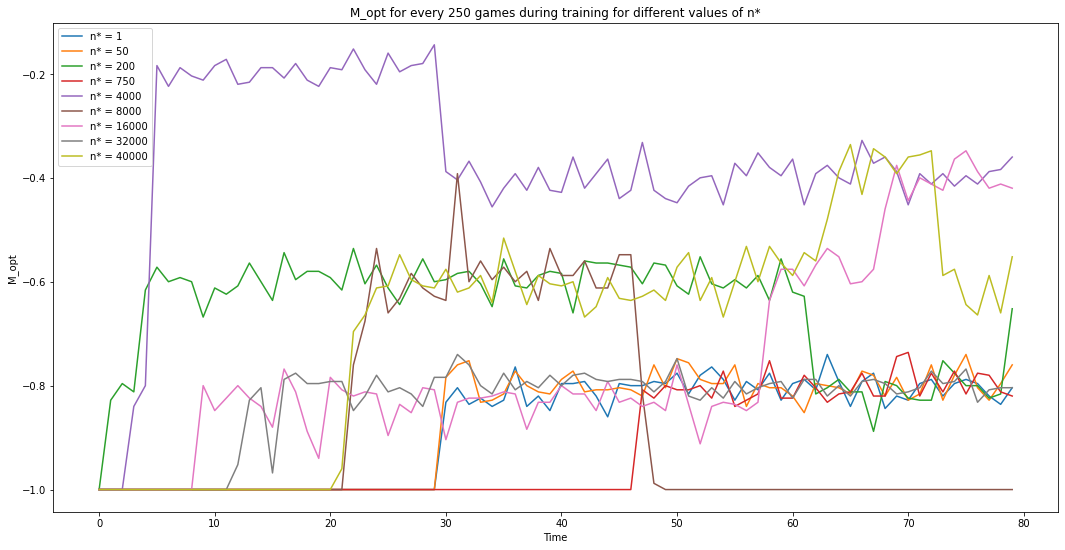

In [53]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of n*')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

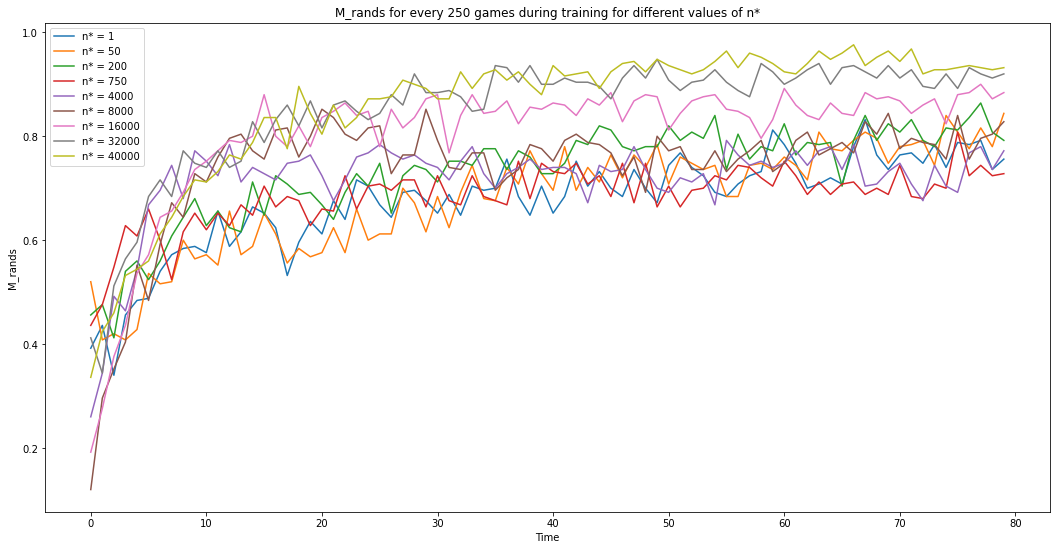

In [54]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of n*')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()

highest -0.4 0.9

### Question 10

In [31]:
def train_against_self_epsilon_n_strategy(n_star, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
   
    
    q_player_one = QLearning()
    q_player_two = QLearning()
    q_player_two.q_values = q_player_one.q_values
    
    q_player_two.q_values = q_player_one.q_values
    
    
    
    for i in tqdm(range(n_games)):
        q_player_one.update_epsilon(new_epsilon = epsilon(i, n_star))
        q_player_two.update_epsilon(new_epsilon = epsilon(i, n_star))
        
        #Switching who starts at each iteration between q_player_one and q_player_two
        if np.mod(i,2)==0:
            q_player_1_reward, q_player_2_reward = play_a_game(env, q_player_one, q_player_two)
        else:
            q_player_2_reward, q_player_1_reward = play_a_game(env, q_player_two, q_player_one)
    
       
        q_player_one.update_qvalue_end(reward=q_player_1_reward)
        q_player_two.update_qvalue_end(reward=q_player_2_reward)
                    
            
    return q_player_one

def play_a_game(game, player_1, player_2):
    turn_player_1 = 'X'
    env.reset()
    grid, _, __ = env.observe()
    for j in range(9):
            
            if env.current_player == turn_player_1:
                move = player_1.act(grid)
            else:
                move = player_2.act(grid)
            
            grid, end, winner = env.step(move, print_grid=False)
 
            
            if end:
                    
                player_1_reward = env.reward(player='X')
                player_2_reward = env.reward(player='O')
                
                return player_1_reward, player_2_reward

In [36]:
n_star =  16000
q_player = train_against_self_epsilon_n_strategy(n_star)

100%|████████████████████████████████████| 20000/20000 [00:34<00:00, 586.71it/s]


In [37]:
M_rand = compute_M(q_player,1)
M_opt = compute_M(q_player,0)
print(f'M_opt: {M_opt} M_rand: {M_rand}')

M_opt: -0.4 M_rand: 0.864


In [79]:
def tile_symbol(x):
    if x==1:
        return 'X'
    if x==-1:
        return 'O'
    return ''

def show_actions(q_player, grid):

    grid_representation = grid_repr(grid)
    labels = [[tile_symbol(grid[x,y]) for y in range(3)] for x in range(3)]
 
    actions = [[q_player.q_values[grid_representation, (x,y)] for y in range(3)] for x in range(3)]
    sns.heatmap(actions, annot=labels, fmt='', xticklabels=False, yticklabels=False)


|X X -|
|- - -|
|O - -|



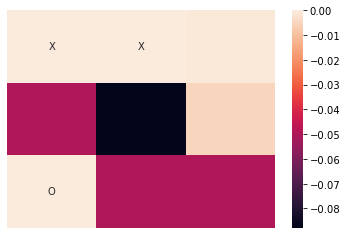

In [81]:
env = TictactoeEnv()
env.step((0,0))
env.step((2,0))
grid, _, _ = env.step((0,1))
env.render()

show_actions(q_player, grid)

|X O -|
|- - -|
|- - -|



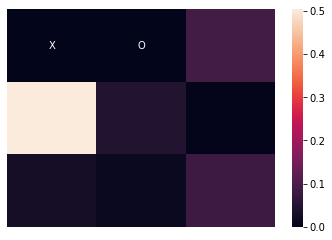

In [83]:
env = TictactoeEnv()
env.step((0,0))
grid, _, _ = env.step((0,1))
env.render()

show_actions(q_player, grid)

|- - -|
|- - -|
|- - -|



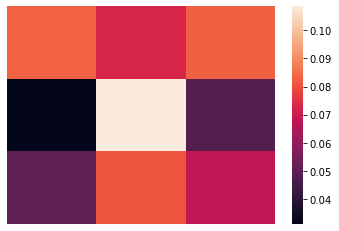

In [84]:
env = TictactoeEnv()
grid, _, _ = env.observe()
env.render()

show_actions(q_player, grid)

## Deep QLearning

In [157]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple, deque 
from random import random, sample

In [272]:
def valid_move(grid, move):
    return grid[(move//3,move%3)] == 0

class DeepQLearner:

    def __init__(self, network, replayBuffer, epsilon=0.1):
        self.epsilon=epsilon
        
        self.model = network
        self.replayBuffer =  replayBuffer 
        self.last_state = None
        self.last_action = None
            
    
    def act(self, grid):
        move = self._act_random(grid) if random()<self.epsilon else self._act_optimal(grid)
        
        self.push(grid,0)
        self.last_state = grid
        self.last_action = move
        return move
    
    
    def update_epsilon(self, new_epsilon):
        self.epsilon = new_epsilon
    
    def _act_optimal(self, grid):
        with torch.no_grad():
            actions_reward = self.model(grid_to_state(grid))
            return torch.argmax(actions_reward).item()
        
        
    def _act_random(self, grid):
        actions = [i for i in range(9) if valid_move(grid,i)]
        return actions[randint(0,len(actions)-1)]
    
    def update_qvalue_end(self, reward=0):
        ### shall we add the end state
        self.push(None, reward)
    
    def push(self, state, reward):
        if self.last_action is not None and self.last_state is not None:
            self.replayBuffer.push( self.last_state, self.last_action, state, reward)

def network():
    return nn.Sequential(nn.Linear(9*2,128),
                                  nn.ReLU(inplace=True),
                                  nn.Linear(128,128),
                                  nn.ReLU(inplace=True),
                                  nn.Linear(128,9))

def grid_to_state(grid):
    return torch.tensor(np.stack([grid>0,grid<0])).float().view(1,-1)

#######from pytroch tutorial
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

class ReplayMemory:

    def __init__(self, capacity):
        self.memory = deque([],maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)
    

In [277]:
def train_deep_q_player(optimal_epsilon=0.5, update_length = 500, average_length = 250.0):
    Turns = np.array(['X','O'])
    
    policy_net = network()
    target_net = network()
    target_net.load_state_dict(policy_net.state_dict())
    replayBuffer = ReplayMemory(10000)
    
    optimizer = optim.Adam(policy_net.parameters(), lr=5e-4)
    criterion = nn.HuberLoss()
    
    deep_q = DeepQLearner(policy_net, replayBuffer, epsilon=0.8)
    optimal = OptimalPlayer(epsilon=0.5, player=Turns[0])

    optimize_deep_q_player = lambda : update_deep_q_player(policy_net, target_net, replayBuffer ,  optimizer, criterion, batch_size = 64, gamma=0.99) if len(replayBuffer)>=64 else 0
    
    average_loss = []
    average_reward = []
    average_non_valid = []
    
    rewards = 0
    loss = 0
    non_valid = 0
    
    for i in tqdm(range(20000)):
        optimal.player = Turns[np.mod(i,2)]
        
        (loss_, reward_, non_valid_) = play_against_optimal(optimal, deep_q, optimize_deep_q_player, Turns[np.mod(i+1,2)])
        
        loss += sum(loss_)/len(loss_)
        rewards += reward_
        non_valid +=  non_valid_
        
        
        if np.mod(i+1,update_length) == 0:
            target_net.load_state_dict(policy_net.state_dict())
        
        if np.mod(i+1,average_length) == 0:
            average_loss.append(loss/average_length)
            average_reward.append(rewards/average_length)
            average_non_valid.append(non_valid/250)
            loss = 0
            rewards = 0
            non_valid = 0
    
    return average_loss, average_reward, average_non_valid, deep_q


def play_against_optimal(optimal, deep_q, update_deep_q_player, deep_q_turn):
    env = TictactoeEnv()
    grid, _, __ = env.observe()
    losses = []
    
    for j in range(9):
            
            if env.current_player == deep_q_turn:
                move =  deep_q.act(grid)
            else:
                move = optimal.act(grid)
                move = move[0]*3+move[1]
            
            
            if not valid_move(grid,move):
                ## je crois que c'est juste
                deep_q.update_qvalue_end(-1)
                return losses, -1, 1
            
            losses.append(update_deep_q_player())
            grid, end, winner = env.step(move, print_grid=False)
            
 
            
            if end:
                    
                reward = env.reward(player=deep_q_turn)
                deep_q.update_qvalue_end(reward)
                return losses, reward, 0
                

def update_deep_q_player(policy_net, target_net, replayBuffer , optim, criterion, batch_size = 64, gamma=0.99):
    ##### inspired from :: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    transitions = replayBuffer.sample(batch_size)
   
    
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), dtype=torch.bool)
    
    non_final_next_states = torch.cat([grid_to_state(s) for s in batch.next_state
                                                if s is not None])
    
    state_batch = torch.cat(list(map(lambda x : grid_to_state(x), batch.state)))
    action_batch = torch.tensor(batch.action).unsqueeze(0)
    reward_batch = torch.tensor(batch.reward).unsqueeze(0)
    

    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    with torch.no_grad():
        next_state_values = torch.zeros(batch_size)
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
    
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * gamma) + reward_batch

    # Compute Huber loss
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optim.zero_grad()
    loss.backward()
    #for param in policy_net.parameters():
    #    param.grad.data.clamp_(-1, 1)
    optim.step()
    return loss.item()
    
    
    

In [ ]:
average_loss, average_reward, average_non_valid, deep_q = train_deep_q_player()

 98%|████████████████████████████████████ | 19516/20000 [13:21<00:21, 22.94it/s]

In [ ]:
plt.plot(average_non_valid)

In [ ]:
plt.plot(average_reward)

In [ ]:
plt.plot(average_loss)

In [269]:
env = TictactoeEnv()
env.step(0)
env.step(4)
env.step(1)
grid, _, _ = env.observe()

In [270]:
deep_q.model(grid_to_state(grid))

tensor([[-0.7105, -0.7160, -0.6931, -0.7033, -0.7451, -0.7564, -0.6955, -0.6782,
         -0.7421]], grad_fn=<AddmmBackward0>)

In [271]:
deep_q._act_optimal(grid)

7

In [257]:
env.render()

|X X -|
|- O -|
|- - -|



In [133]:
learner.act(grid)

(0, 0)